In [9]:
from utils import get_aml_data
import matplotlib.pyplot as plt

X, y = get_aml_data()

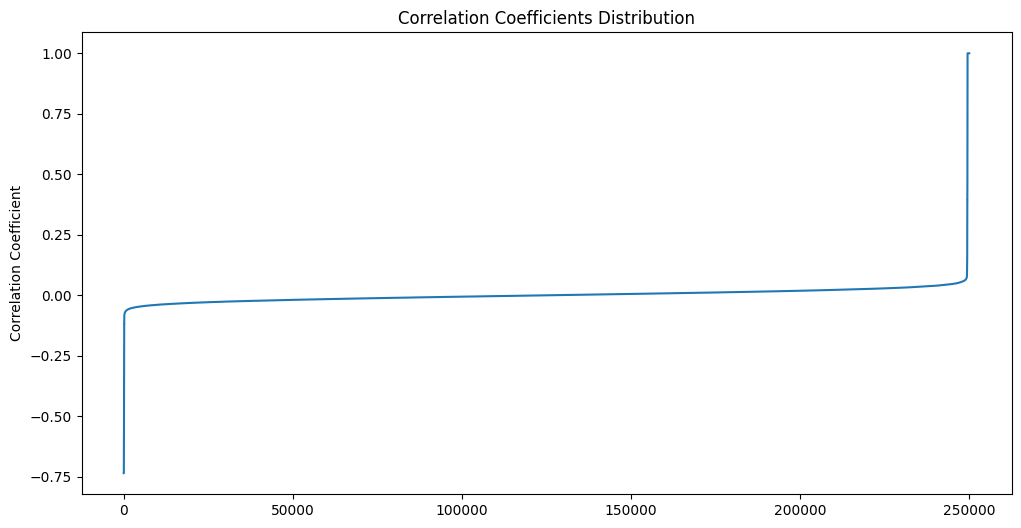

In [10]:
correlations = X.corr().values.flatten()
correlations.sort()

plt.figure(figsize=(12, 6))
plt.plot(range(len(correlations)), correlations)
plt.title("Correlation Coefficients Distribution")
plt.ylabel("Correlation Coefficient")
plt.show()

In [11]:
# Compute correlation matrix
correlation_matrix = X.corr()

# Identify highly correlated columns
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            # for any subset of correlated colums, we keep the one with highest index (because j > i)
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

print("Highly correlated columns:", highly_correlated_columns)

Highly correlated columns: {128, 451, 493, 336, 433, 472, 281, 378, 475, 318}


/mnt/c/Users/kubak/Documents/Studia/7 semestr/AutoML/aml/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


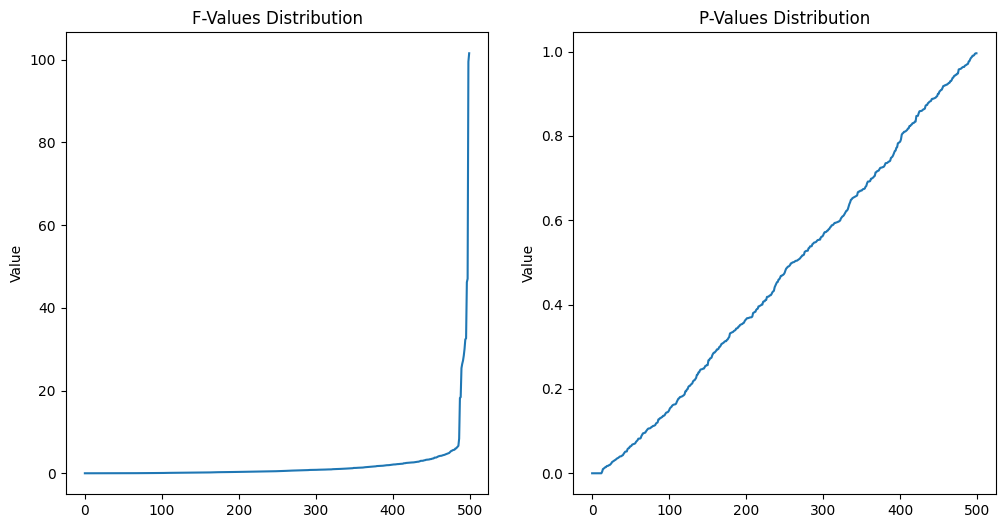

In [12]:
from sklearn.feature_selection import f_classif

scores, p_values = f_classif(X, y)
scores.sort()
p_values.sort()

figure, (left, right) = plt.subplots(1, 2)
figure.set_size_inches(12, 6)

left.plot(range(len(scores)), scores)
left.set_title("F-Values Distribution")
left.set_ylabel("Value")

right.plot(range(len(p_values)), p_values)
right.set_title("P-Values Distribution")
right.set_ylabel("Value")

plt.show()

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # for classification problems

# Select top k features based on ANOVA F-statistic
k = 100  # number of features to keep
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
print("Selected columns:", selected_columns)

Selected columns: Index([  4,  10,  26,  42,  43,  44,  46,  48,  49,  53,  55,  56,  61,  64,
        73,  74,  85, 105, 116, 119, 120, 121, 128, 136, 137, 139, 149, 152,
       153, 161, 163, 168, 175, 177, 184, 196, 199, 204, 205, 207, 211, 226,
       227, 241, 243, 245, 246, 248, 255, 277, 278, 281, 282, 285, 286, 296,
       298, 301, 309, 317, 323, 329, 333, 336, 338, 343, 347, 348, 377, 378,
       382, 384, 409, 410, 411, 412, 413, 414, 420, 424, 425, 430, 431, 442,
       444, 445, 453, 454, 456, 462, 466, 468, 471, 472, 475, 481, 493, 494,
       496, 497],
      dtype='int64')


/mnt/c/Users/kubak/Documents/Studia/7 semestr/AutoML/aml/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
